In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier

# Задание №1: построение кривых обучения

#### В качестве исходных данных был выбран датасет, содержащий информацию о графическом изображении букв латинского алфавита. Информация выражена в ряде определенных коэффициентов (16 параметров), отвечающих за наклон, размер и т. д. Задачей классификации является установление по данным числовым характеристикам символ, за который они отвечают. Выборка содержит 20 000 строк с различными вариантами написания символов A-Z с использованием различных шрифтов. Числовые параметры каждого символа содержатся в 16 столбцах исходной таблицы.


In [2]:
column_names = ['lettr','x-box','y-box','width','high','onpix','x-bar',
                'y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
df = pd.read_csv('letter-recognition.data', sep=',', names = column_names)
Y = df['lettr']
X = df.drop(columns = 'lettr')
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


### В качестве первого примера выберем модель DecisionTreeClassifier.

In [3]:
model = DecisionTreeClassifier()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
train_size, train_score, test_score = learning_curve(estimator = model, X=X, y = Y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 100))

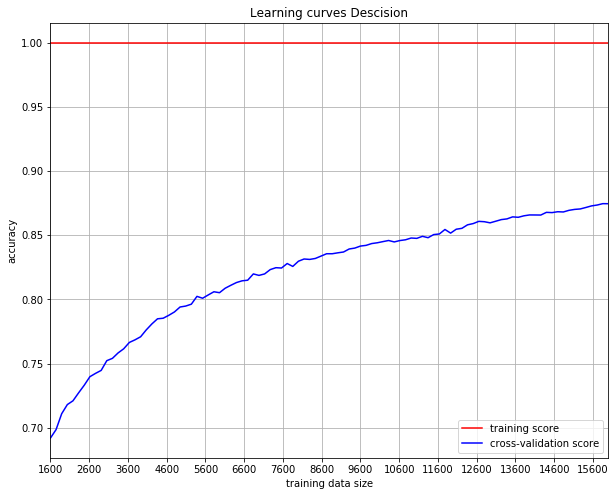

In [4]:
plt.figure(figsize = (10,8))
plt.plot(train_size, train_score.mean(axis = 1), color ='r', label = 'training score')
plt.plot(train_size, test_score.mean(axis = 1), color = 'b', label = 'cross-validation score')
plt.xlabel('training data size')
plt.xlim([train_size.min(),train_size.max()])
plt.xticks(range(train_size.min(),train_size.max(),1000))
plt.ylabel('accuracy')
plt.title('Learning curves Descision')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Из данных графиков видно, что точность на обучающей выборке всегда равна единице и не изменяется в зависимости от размера тестовой выборки. В то-же время точность на тестовой выборке растет, но не приближается к точности тренировочной выборки. Данная ситуация может говорить о переобучении модели. Модель безошибочно определяет элементы тренировочной выборки и гораздо хуже работает с тестовой выборкой. Увеличение размера выборки может повысить точность на тестовой выборке, но проблему переобучения данной модели скорее всего не решит.

### В качестве второго примера выберем модель RandomForestClassifier.

In [5]:
model2 = RandomForestClassifier(max_depth=None, n_estimators=10)
train_size, train_score, test_score = learning_curve(estimator = model2, X=X, y = Y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 100))

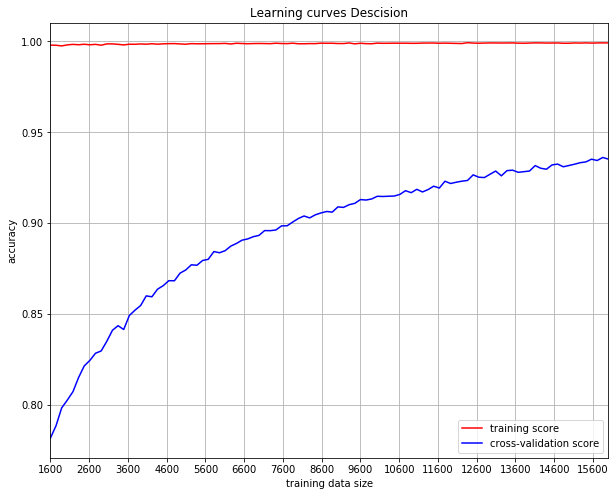

In [6]:
plt.figure(figsize = (10,8))
plt.plot(train_size, train_score.mean(axis = 1), color ='r', label = 'training score')
plt.plot(train_size, test_score.mean(axis = 1), color = 'b', label = 'cross-validation score')
plt.xlabel('training data size')
plt.xlim([train_size.min(),train_size.max()])
plt.xticks(range(train_size.min(),train_size.max(),1000))
plt.ylabel('accuracy')
plt.title('Learning curves Descision')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### По графику видно, что для данного алгоритмы характерны проблемы, аналогичные первому пункту, но при это достигается большая точность 

# Задание №2. GridSearch

### В данном задании требуется подобрать оптимальные параметры модели с помощью GridSearch. По сути это перебор возможных комбинаций и сравнение результатов работы модели для них. Данная процедура является довольно сложной и требует большего количества вычислений. Поэтому в качестве исследуемой модели выберем классификатор KNeighborsClassifier. По сути единственным возможным для оценки GridSearch параметром данной модели является n_neighbors, оставльные параметры отвечают за используемые метрики и т.д.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### Запустим алгоритм с исходными параметрами. (по умолчанию n_neighbors = 5)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X ,Y, test_size = 0.25, random_state = 1)
neighbors_model = KNeighborsClassifier()
neighbors_model.fit(x_train, y_train)
neighbors_model.score(x_test, y_test)

0.9518

### Далее используем GridSearchCV для поиска оптимального параметра n_neighbors от 1 до 20

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
n_neighbors = np.arange(1,20)
grid = GridSearchCV(estimator = KNeighborsClassifier(),param_grid={"n_neighbors":n_neighbors}, cv = 3)
grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [12]:
grid.best_estimator_.score(x_test, y_test)

0.9516

In [13]:
grid.best_estimator_.score(X, Y)

0.9879

### В результате работы была получена модель с оптимальным параметром n_neighbors=1
### Точность работы алгоритма с параметрами по умолчанию (n_neighbors=5) составила: 0.9518
### Точность наиболее оптимального варианта (n_neighbors=1) составила 1.0, что является наилучшим возможным результатом. Одного соседнего ближайщего элемента достаточно чтобы безошибочно классифицировать объект. Это можно объяснить самим характером исходной выборки т.к. написание символов латинского алфавита всегда примерно одинаково, то и геометрические параметры данных символов изменяются не сильно, а значит выборка формирует n четко обозначенных кластверов, каждый элемент которого относится к одному классу.

# GridSearch с двумерной сеткой
### Будем использовать  RandomForestClassifier и искать оптимальны значения параметров min_samples_split и n_estimators.

In [14]:
n_estimators = np.arange(30,60)
min_samples_split = np.arange(2,10)
grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid={"n_estimators":n_estimators,
                                                                     "min_samples_split":min_samples_split},cv = 3)
grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [15]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=57,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
grid.best_estimator_.score(x_test, y_test)

0.9604

In [17]:
HM = grid.cv_results_['mean_test_score'].reshape(min_samples_split.size, n_estimators.size)
#HM = np.concatenate((np.array([HM.mean() for i in range(HM.shape[0]*2)]).reshape(19,2), HM), 1)
#HM = np.vstack((np.array([HM.mean() for i in range(HM.shape[1])]), HM[HM[:,0] < 2]))

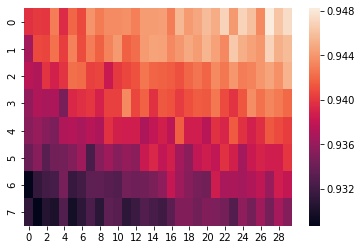

In [18]:
import seaborn as sns
sns.heatmap(HM)

### Тепловая карта с результатами работы модели с данными параметрами. 
### по оси абсцисс: min_samples_split (Минимальное количество выборок, необходимое для разделения внутреннего узла)
### по оси ординат: n_estimators (Количество деревьев в лесу)

## На тепловой карте оси отображены со сдвигом. Настоящие значения изменяются от 2 до 10 для min_sample_split и от 30 до 60 для n_estimators
### Из тепловой карты видно, что наилучшим результатом явлется модель с парметрами n_estimators=57 и min_sample_split=2 (самый светлый участок, а следовательно и наилучшая точность), что полностю согласуется с теми результатами, которые возвращает GridSearch в качестве лучшей модели.